In [7]:
from google.cloud import storage

def download_file(bucket_name = 'train_data_solar_project',
                              blob_name = 'X_train_copernicus.npz', 
                              download_to_disk = False, 
                              destination_file_name = '../raw_data/data.npz'):
    
    """Download a file from Google Cloud Storage. 
    If download_to_disk = False then it will save to memory.  
    If download_to_disk = True then it will save to your local disk.
    """
    
    storage_client = storage.Client()

    bucket = storage_client.bucket(bucket_name)

    blob = bucket.blob(blob_name)
    
    if download_to_disk == True:
        
        blob.download_to_filename(destination_file_name)
        print(
            "Downloaded storage object {} from bucket {} to local file {}.".format(
            blob_name, bucket_name, destination_file_name
        )
    )

    if download_to_disk == False:

        contents = blob.download_as_string()

        print("Downloaded storage object {} from bucket {} as the following string: {}.".format(
            blob_name, bucket_name, contents
        )
    )
        
    return 'Download complete.'

In [8]:
import numpy as np
import datetime

def number_of_observations(actual_day):
    
    '''Takes a date and returns the number of observations taken that day.'''
    
    dx = datetime.datetime.strptime(actual_day, "%d-%m-%Y")
    dx = dx.date()

    d1 = datetime.date(2012,1,1)
    d2 = datetime.date(2012,2,20)
    d3 = datetime.date(2012,4,12)
    d4 = datetime.date(2012,8,28)
    d5 = datetime.date(2012,10,20)
    d6 = datetime.date(2012,12,31)
    
    obs = 0
    
    if dx>=d1 and dx<=d2:
        obs=4    
    elif dx>d2 and dx<=d3:
        obs=5
    elif dx>d3 and dx<=d4:
        obs=6
    elif dx>d4 and dx<=d5:
        obs=5
    elif dx>d5 and dx<=d6:
        obs=4

    if obs!=0:
        return obs
    else:
        return ("The date out of range.")

In [9]:
number_of_observations('21-06-2012')

6

In [97]:
def date_index(actual_day):
    
    '''Takes a date and returns the list of relevant indices in the data.'''
    
    data = np.load('../raw_data/baseline.npz', allow_pickle = True) # Figure out to make this a python script
    riv = data['datetime']
    date_format = []
    
    for i in range(riv.shape[0]):
        date_format.append(riv[i].date()) 
    
    dx = datetime.datetime.strptime(actual_day, "%d-%m-%Y")
    dx = dx.date()
   
    index = []
    
    for i in range(riv.shape[0]):
        if dx == date_format[i]:
            index.append(i)
    
    if not index:
        return ("The date out of range.")
    else:
        return index

In [99]:
# Finding the index for the last day of Janurary for model-building purposes
date_index('31-01-2012')

[120, 121, 122, 123]

In [ ]:
def day_information(
        feature = SAA,
        observation = 96,
        timestamp = 0
        ):
        # Print total radiation for all pixels in a timestamp
        #print(f’The radiation on {date[observation]} was {feature[observation, timestamp, :, :].sum()}.’)
        #print(f’The radiation on {date[observation]} looks like:’)
        time = datetime.datetime(year = date[observation].year,
                                 month=date[observation].month,
                                 day = date[observation].day,
                                 hour=date[observation].hour,
                                 minute=date[observation].minute)
        delta=datetime.timedelta(minutes=15)
        time = time - datetime.timedelta(minutes=60)
        # we’re setting the num of obs in day,
        observation_max = n_obs_in_day(observation)
        # Define number of rows and columns you want in your figure
        nrow = observation_max
        ncol = 8
        fig = plt.figure(figsize = (100,60))
        gs = GridSpec(nrow, ncol + 1, figure=fig)
        # Fill your figure with desired plots
        axes = []
        for j in range(observation_max):
            for i in range(8):
                time=time+delta
                #plt.subplot(6, 8, j * 8 + i + 1)
                axes.append(fig.add_subplot(gs[j, i]))
                plt.title(time.time(), fontsize=80)
                plt.xticks(fontsize=35)\
                plt.yticks(fontsize=35)
                im = axes[-1].imshow(feature[observation+j,i,:,:],
                           cmap=‘jet’, norm=‘linear’, vmin = min_max(feature)[0],vmax= min_max(feature)[1])
        month = date[observation].month
        fig.suptitle(f’Solar Azimuth Angle on {date[observation].day} of {calendar.month_name[month]}‘,
                     fontsize=110)
        # Shared colorbar method 1\n”,
        ax9 = fig.add_subplot(gs[:, 8])
        axes.append(ax9)
        cbar = fig.colorbar(im, cax=axes[-1],)
        tick_font_size = 90
        cbar.ax.tick_params(labelsize=tick_font_size)
        # we should use a variable to describe the feature
        # got an error when tried
        cbar.ax.set_title(f’SAA Range’,fontsize=80)

In [ ]:
ax9 = fig.add_subplot(gs[:, 8])
cbar = fig.colorbar(im, cax=axes[-1],)
tick_font_size = 90
cbar.ax.tick_params(labelsize=tick_font_size)
cbar.ax.set_title(f’SAA Range’,fontsize=80)

In [96]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def one_day_evolution(
    feature = 'CLS',
    date = '21-06-2012'):
    
    '''Takes date and time as input to returns the visual evolution of selected feature over that day.'''    

    data = np.load('../raw_data/baseline.npz', allow_pickle = True)
    DATE = data['datetime']
    
    observations = number_of_observations(date)
    selected_feature = data[feature]
    index = date_index(date)
    first_index = date_index(date)[0]
    time = DATE[first_index] 
    time = time - datetime.timedelta(minutes=60)
    delta=datetime.timedelta(minutes=15)
        
    vmin=(selected_feature[first_index:first_index+observations,:,:,:]).min()
    vmax=(selected_feature[first_index:first_index+observations,:,:,:]).max()
        
    X = [[0,0,81,81]]
        
    plt.figure (figsize = (120,80))
    plt.title(f"Displaying the full day on {date}", fontsize=100)
    cbar = plt.colorbar(pic(norm='linear', cmap='jet'), ax=ax)

    if feature == 'CLS':
        for j in range(observations):
            for i in range(8):
                time=time+delta
                ax = plt.subplot(observations, 8, j * 8 + i + 1)
                plt.title(time.time(), fontsize=100)
                pic = ax.imshow(selected_feature[first_index+j,i,:,:], cmap='jet', vmin=vmin, vmax=vmax)
    
    elif feature == 'GHI':
        for j in range(observations):
            for i in range(8):
                time=time+delta
                ax = plt.subplot(observations, 8, j * 8 + i + 1)
                plt.title(time.time(), fontsize=100)
                if i > 3:
                    pic = ax.imshow(X, cmap='binary', vmin=0, vmax=0)
                    plt.xlim(200)
                    plt.ylim(200)

                else:
                    pic = ax.imshow(selected_feature[first_index + j, i, :, :], cmap='jet', vmin=vmin, vmax=vmax)
        
    print(f'The radiation on {date} was {selected_feature[index[0] + j, :, :, :].sum()} W/m\u00b2.')


In [95]:
one_day_evolution('CLS', '26-02-2012')

/var/folders/jt/y51sdqz51jj_nz5g6w_ck1gm0000gp/T/ipykernel_1503/4253755504.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(observations, 8, j * 8 + i + 1)


The radiation on 26-02-2012 was 13255555.630000003 W/m².


In [94]:
one_day_evolution('GHI', '21-04-2012')

/var/folders/jt/y51sdqz51jj_nz5g6w_ck1gm0000gp/T/ipykernel_1503/4253755504.py:45: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(observations, 8, j * 8 + i + 1)


The radiation on 21-04-2012 was 8521267.43 W/m².


In [14]:
import numpy as np

def cls_plot(feature = 'CLS',
             date='26-02-2012'):
    
    """Given the date, return the plot of CLS throughout the day """
    
    data = np.load('../raw_data/baseline.npz', allow_pickle = True)
    DATE = data['datetime']
    selected_feature = data[feature]

    plt.figure (figsize = (120,80))
    plt.title(f"Displaying the full day on {date}", fontsize=100)

    number_of_obs=number_of_observations(date)
    first_index=date_index(date)[0]
    time=DATE[first_index] 
    time=time-datetime.timedelta(minutes=60)
    delta=datetime.timedelta(minutes=15)

    vmin_cls=(selected_feature[first_index:first_index+number_of_obs,:,:,:]).min()
    vmax_cls=(selected_feature[first_index:first_index+number_of_obs,:,:,:]).max()

    for j in range(number_of_obs):
        for i in range(8):
            time=time+delta
            ax=plt.subplot(number_of_obs, 8, j * 8 + i + 1)
            plt.title(time.time(), fontsize=100)
            im=ax.imshow(selected_feature[first_index+j,i,:,:], cmap='jet', vmin=vmin_cls, vmax=vmax_cls)
    # divider = make_axes_locatable(ax)
    # divider.append_axes("right", size="50%", pad=0.05)


In [15]:
cls_plot()

/var/folders/jt/y51sdqz51jj_nz5g6w_ck1gm0000gp/T/ipykernel_1503/353869707.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(number_of_obs, 8, j * 8 + i + 1)


In [77]:
import matplotlib.pyplot as plt

def one_day_cls_evolution(
    date = '21-06-2012'):
    
    '''Takes date and time as input to returns the visual evolution of CLS over that day.'''    

    data = np.load('../raw_data/baseline.npz', allow_pickle = True)
    
    feature = data['CLS']
    index = date_index(date)
    
    min_values = []
    max_values = []

    for x in feature[index[0],:,:,:]:
        min_values.append(np.min(x))
        max_values.append(np.max(x))

    vmin = np.min(min_values)
    vmax = np.max(max_values)  
    
    plt.figure (figsize = (100,20))
    
    for j in range(4):
        for i in range(8):
            plt.subplot(4, 8, j * 8 + i + 1)
            plt.imshow(feature[index[0] + j, i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)
    
    # Print total radiation for all pixels in a timestamp
    print(f'The radiation on {date} was {feature[index[0] + j, :, :, :].sum()} W/m\u00b2.')


The radiation on 21-01-2012 was 17287873.970000003 W/m².


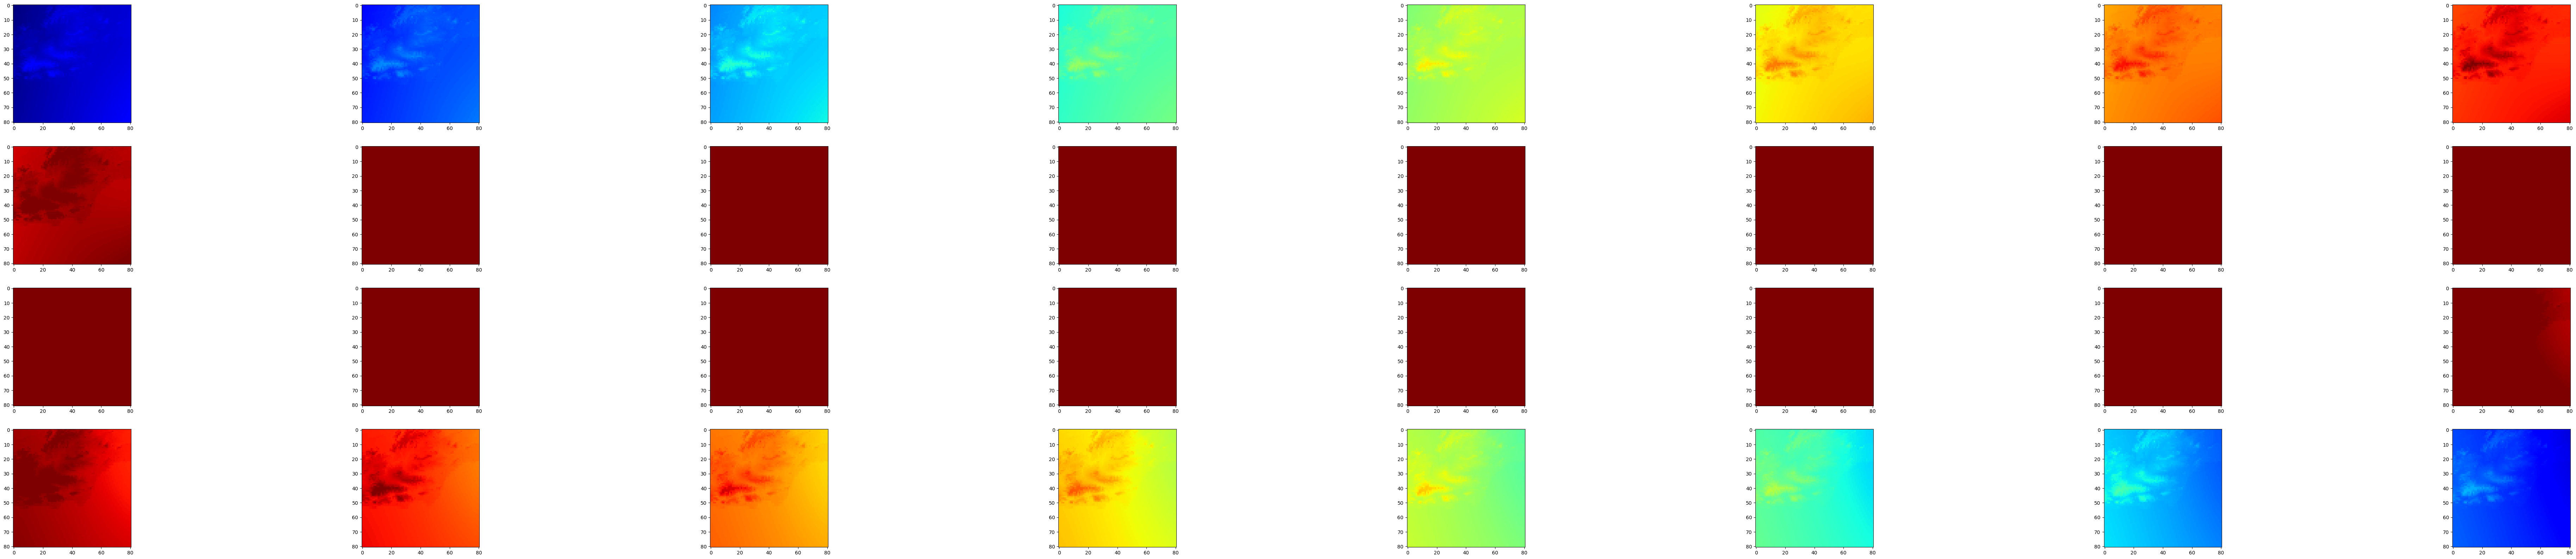

In [78]:
one_day_cls_evolution('21-01-2012')

In [79]:
import matplotlib.pyplot as plt

def one_day_ghi_evolution(
    date = '21-06-2012'):
    
    '''Takes date and time as input to returns the visual evolution of the GHI over that day.'''    

    data = np.load('../raw_data/baseline.npz', allow_pickle = True)
    
    feature = data['GHI']
    index = date_index(date)
    
    min_values = []
    max_values = []

    for x in feature[index[0],:,:,:]:
        min_values.append(np.min(x))
        max_values.append(np.max(x))

    vmin = np.min(min_values)
    vmax = np.max(max_values)  
    
    plt.figure (figsize = (100,20))
    
    for j in range(4):
        for i in range(4):
            plt.subplot(4, 8, j * 8 + i + 1)
            plt.imshow(feature[index[0] + j, i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)
    
    # Print total radiation for all pixels in a timestamp
    print(f'The radiation on {date} was {feature[index[0] + j, :, :, :].sum()} W/m\u00b2.')


The radiation on 21-04-2012 was 22632322.53 W/m².


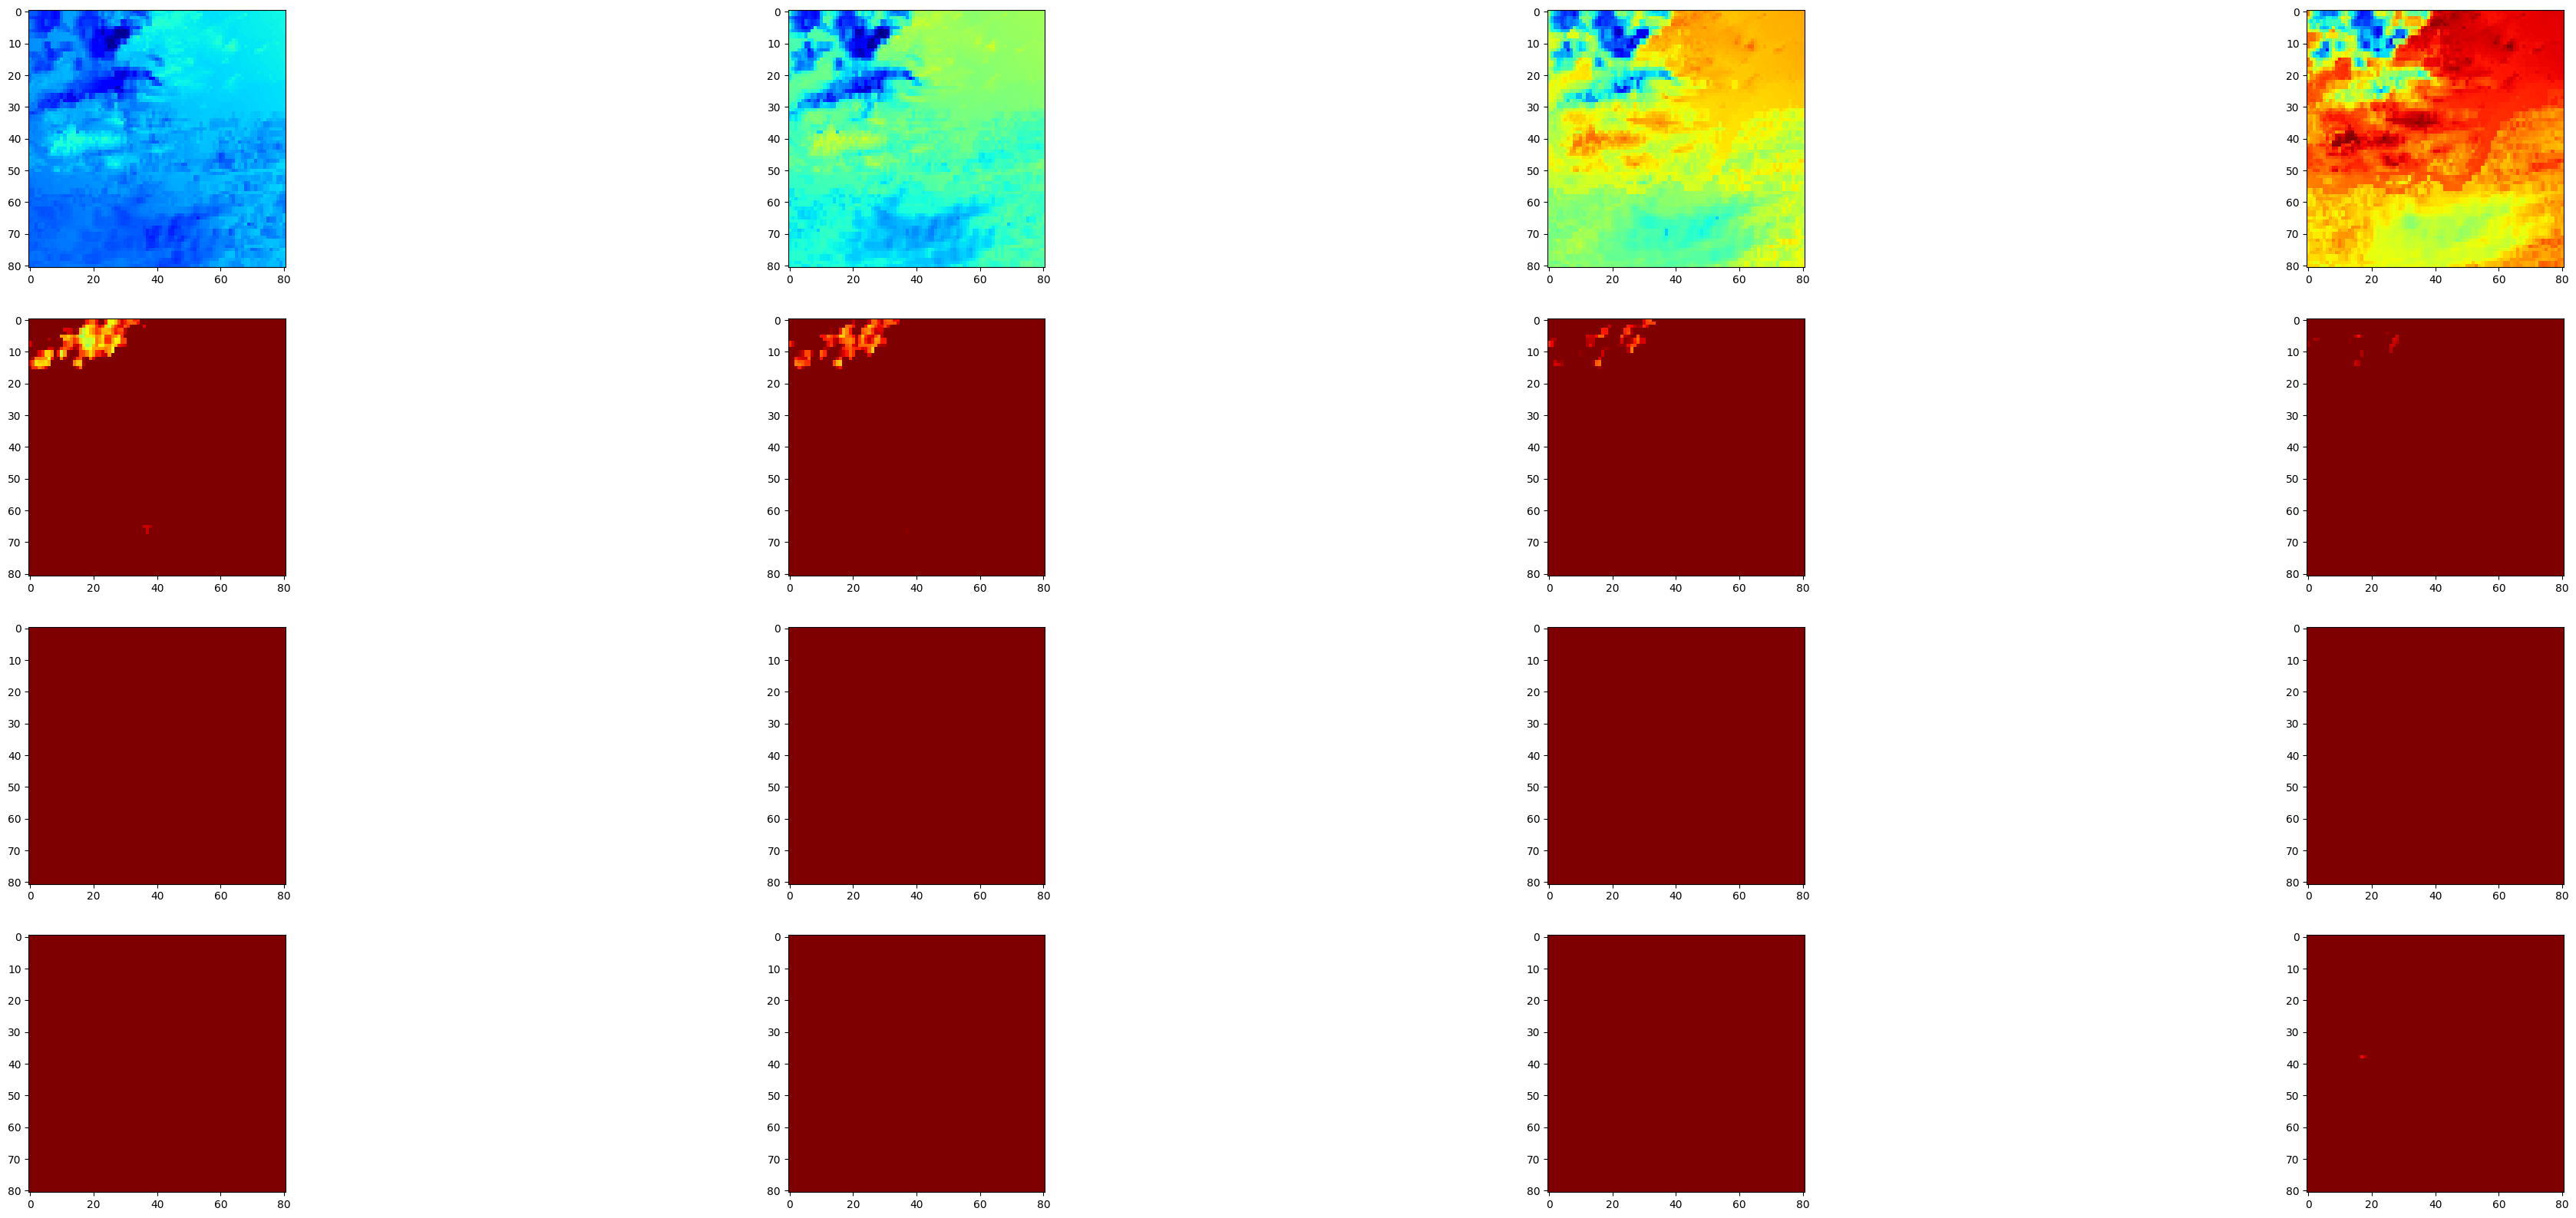

In [81]:
one_day_ghi_evolution('21-04-2012')

In [ ]:
def add_dumb_layers(observation):
    '''Takes a timestamp and duplicates four times for comeplete GHI datasets''' 
    
    X_train = np.load('../raw_data/X_train_copernicus.npz')
    
    new_layer = np.expand_dims(X_train['GHI'][observation][3], axis = 0)
    selected_layer = X_train['GHI'][observation]
    
    for i in range(4):
        selected_layer = np.vstack((selected_layer, new_layer))
        return selected_layer[4:8, :, :]